In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data=pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(7500, 20)

In [33]:
#coverting the pandas dataframe into a list of lists
records=[]
for i in range(0,7501):
    records.append([str(data.values[i,j]) for j in range(0,20)])
records=np.array(records)

In [35]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(records)
data = pd.DataFrame(data, columns = te.columns_)

#dropping nan values
data=data.drop(columns=['nan'])

In [10]:
item_counts={}
for col in data.columns:
    item_counts[col]=len(data[data[col]==True])

In [11]:
item_counts=sorted(item_counts.items(),key=lambda kv :kv[1],reverse=True)
df_item_counts=pd.DataFrame(item_counts)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

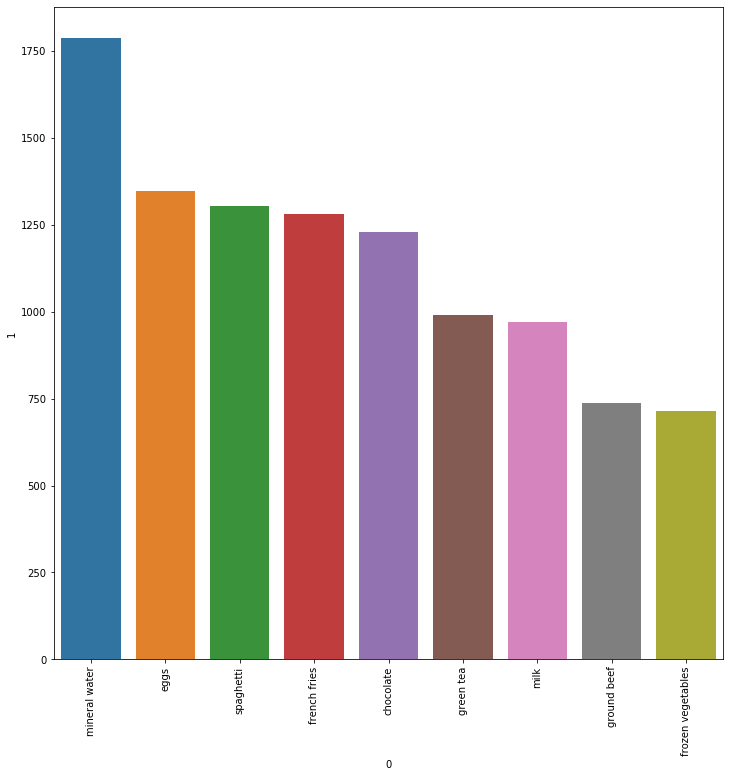

In [70]:
plt.figure(figsize=(12,12))
sns.barplot(y=df_item_counts[1].head(10), x=df_item_counts[0].head(10))
plt.xticks(rotation=90)

In [24]:
df_item_counts=df_item_counts.rename(columns={0:"items",1:'count'})

In [26]:
#adding a support column
df_item_counts['Support']= df_item_counts['count']/7501

Upon viewing the support values, we see that only 7 individual items have support values more than 10%. So, we need to set a realistic support value for filtering the results.

In [52]:
#After trying a couple of different support values, 3% was chosen as the appropriate support value
from mlxtend.frequent_patterns import apriori,association_rules
df=apriori(data, min_support = 0.03, use_colnames = True)
df

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [42]:
df['length']=df['itemsets'].apply(lambda x: len(x))

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1


In [43]:
#seeing results for pair of items (len>1)
df[df.length>1]

,support,itemsets,length
25,0.052660,"(mineral water, chocolate)",2
26,0.050927,"(mineral water, eggs)",2
27,0.059725,"(mineral water, spaghetti)",2


In [58]:
#We can see that the results are dominated by the mineral water column as mineral water is bought with almost every item.Hence, to get an accurate analysis we should drop that column.
data=data.drop(columns=['mineral water'])
df=apriori(data, min_support = 0.03, use_colnames = True)
df

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [ ]:
#After playing around with various confidence values, 20% confidence was chosen

In [53]:
df_association_rules = association_rules(df, metric="confidence", min_threshold=0.2)
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711
1,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383
2,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823
4,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581
5,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070
6,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232
7,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640
8,(milk),(eggs),0.129583,0.179709,0.030796,0.237654,1.322437,0.007509,1.076009
9,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081


In [56]:
#sorting it using confidence values 
df_association_rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
13,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823
4,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581
8,(milk),(eggs),0.129583,0.179709,0.030796,0.237654,1.322437,0.007509,1.076009
5,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070
12,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
6,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232
1,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383
9,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081


Items listed in the consequents column are more likely to be bought if one buys the items in the antecedent column. Also, after dropping the mineral water item, we have more meaningful associations. Some of them are:

 ground beef -> spaghetti
 
 milk -> spaghetti
 
 milk -> chocolate 
   